
We saw in the previous classes how to deal with data of a single variable, sea level as a function of time, and how to make some line plots.  We will now deal with data in two dimensions: time and space (in this case depth).  To visualize these types of data we will use contour plots, with values contoured (or color-shaded) on a grid with depth along one axis and time on the other.

But first, let's continue to work with line plots and see more features of pandas DataFrames.  A data set containing a summary of surface values from HOT is avaiable at https://hahana.soest.hawaii.edu/hot/products/HOT_surface_CO2.txt  We will use this to do some line plotting.

The next set of data come from one of the two HOT sites: https://hahana.soest.hawaii.edu/hot/ in the data archive for CTD: ftp://ftp.soest.hawaii.edu/hot/ctd/year1_31ctd.dat and we will use this to look at contour plots.

First, as usual, we import our needed functions:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

## 1. Line plots

The first data set is called "HOT_surface_CO2.txt" and can be found at http://hahana.soest.hawaii.edu/hot/products/products.html.  The dataset was by John Dore (jdore@montana.edu) and can be cited as:

Dore, J.E., R. Lukas, D.W. Sadler, M.J. Church, and D.M. Karl.  2009.  Physical and biogeochemical modulation of ocean acidification in the central North Pacific.  Proc Natl Acad Sci USA 106:12235-12240.

There is also documentation (HOT_surface_CO2_readme.pdf) at http://hahana.soest.hawaii.edu/hot/products/products.html

The data are laid out in an ASCII table, so we can use pandas read_csv to read them in and put them in a DataFrame.  Note that the file has header information at the top, so we will skip that (header=7 to skip the top seven lines).  Note also that the file has column headings, so we can read them directly. Remember the tide gauge data had none, so we manually created it; here we just read it and the DataFrame will use it as the column headings.  Finally, this file is __not__ comma separated, but __white space__ separated (data columns are separated by a different number of white spaces).

In [2]:
URL = 'https://hahana.soest.hawaii.edu/hot/hotco2/HOT_surface_CO2.txt'
HOT_surface = pd.read_csv(URL,header=7, delim_whitespace=True)

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_6795/1939045871.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  HOT_surface = pd.read_csv(URL,header=7, delim_whitespace=True)


In [3]:
HOT_surface.head()

,cruise,days,date,temp,sal,phos,sil,DIC,TA,nDIC,...,pHmeas_insitu,pHcalc_25C,pHcalc_insitu,pCO2calc_insitu,pCO2calc_20C,aragsatcalc_insitu,calcsatcalc_insitu,freeCO2_insitu,carbonate_insitu,notes
0,1,30,31-Oct-88,26.283,35.186,0.08,0.71,1963.91,2319.5,1953.5,...,-999.0,8.1292,8.1097,330.9,256.3,3.98,6.02,9.06,250.2,abc
1,2,62,2-Dec-88,25.659,34.984,0.09,0.99,1958.94,2304.9,1959.8,...,-999.0,8.1193,8.1092,330.6,262.6,3.87,5.86,9.20,243.5,bc
2,3,99,8-Jan-89,24.610,35.028,0.07,0.93,1963.77,2305.0,1962.2,...,-999.0,8.1113,8.1168,324.3,268.7,3.80,5.77,9.27,240.1,c
3,4,148,26-Feb-89,23.479,34.883,0.09,0.88,1957.80,2295.5,1964.4,...,-999.0,8.1091,8.1316,310.9,269.7,3.74,5.69,9.15,237.2,cd
4,5,177,27-Mar-89,24.278,34.735,0.12,2.01,1946.33,2283.0,1961.2,...,-999.0,8.1113,8.1218,317.7,266.8,3.74,5.69,9.17,236.4,ac


It appears that the data file uses -999.0 as the missing values, so let's replace that now, and make a quick plot to see what it looks like.

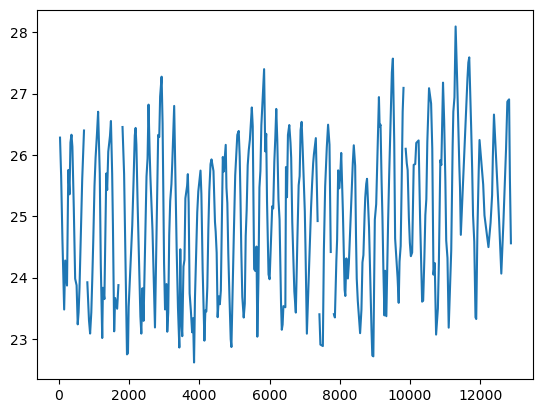

In [4]:
HOT_surface = HOT_surface.replace(-999.0, np.nan)
plt.plot(HOT_surface['days'],HOT_surface['temp']);

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_6795/2389532692.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  HOT_surface['date'] = pd.to_datetime(HOT_surface['date'])


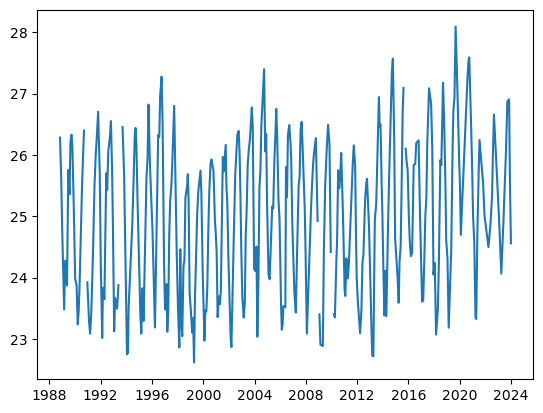

In [5]:
# convert to DateTime
HOT_surface['date'] = pd.to_datetime(HOT_surface['date'])
plt.plot(HOT_surface['date'],HOT_surface['temp']);

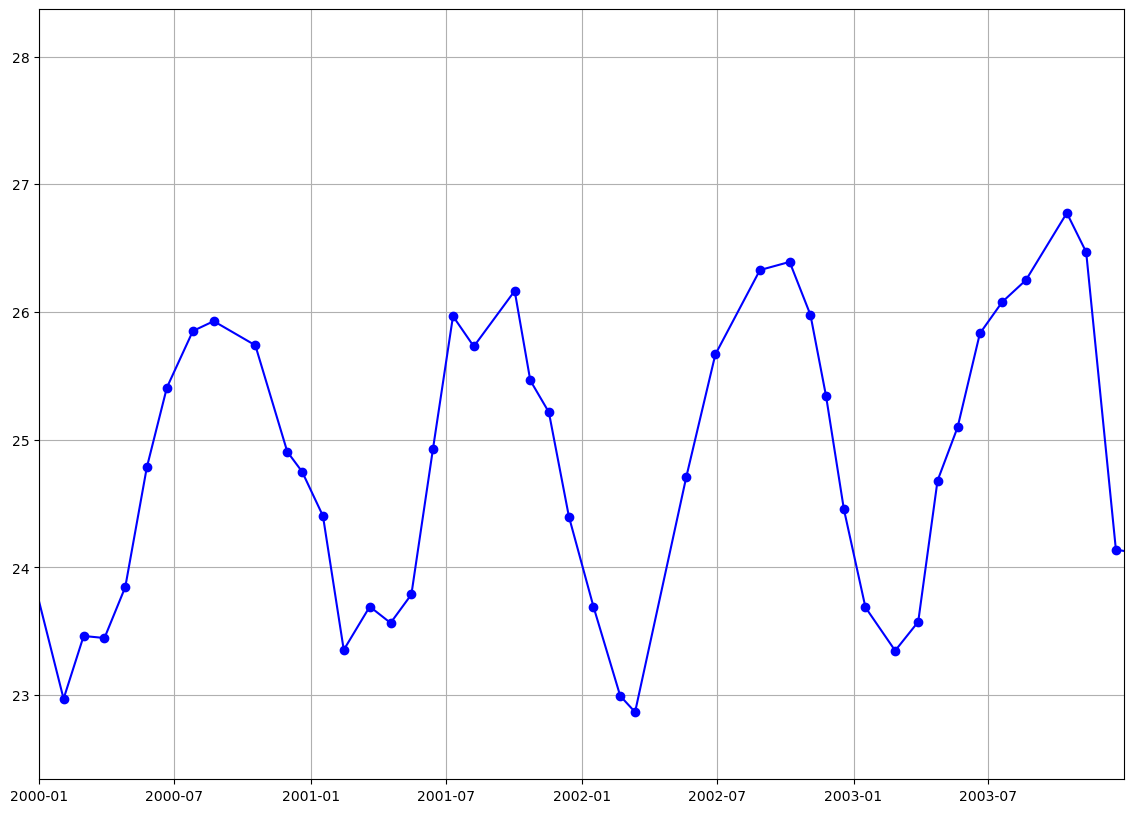

In [6]:
# Let's zoom into a three year period
from datetime import datetime
plt.figure(figsize=(14,10))
plt.plot(HOT_surface['date'],HOT_surface['temp'],'bo-')
plt.xlim(datetime(2000,1,1),datetime(2003,12,31))
plt.grid()

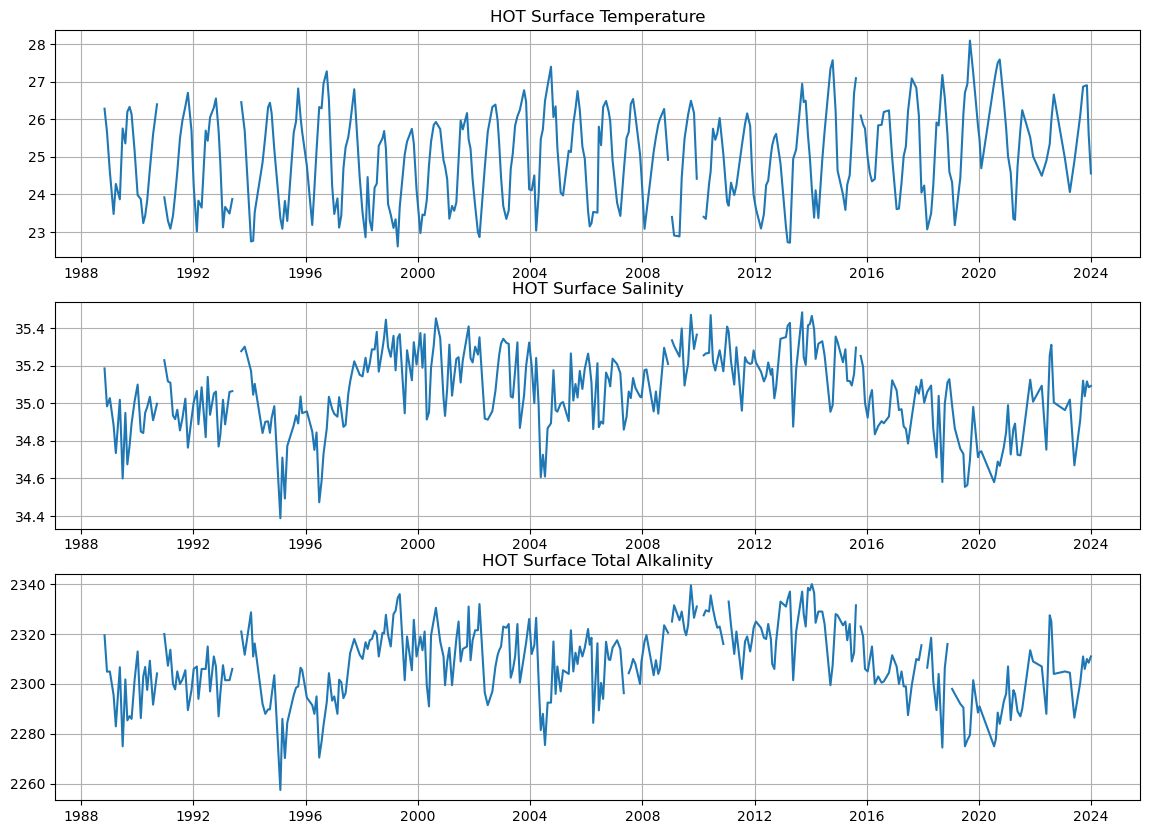

In [7]:
# Example 1 three panel plot
plt.subplots(nrows=3,ncols=1,figsize=(14,10))
plt.subplot(3,1,1)
plt.plot(HOT_surface['date'],HOT_surface['temp'])
plt.title('HOT Surface Temperature')
plt.grid()
plt.subplot(3,1,2)
plt.plot(HOT_surface['date'],HOT_surface['sal'])
plt.title('HOT Surface Salinity')
plt.grid()
plt.subplot(3,1,3)
plt.plot(HOT_surface['date'],HOT_surface['TA'])
plt.title('HOT Surface Total Alkalinity')
plt.grid()

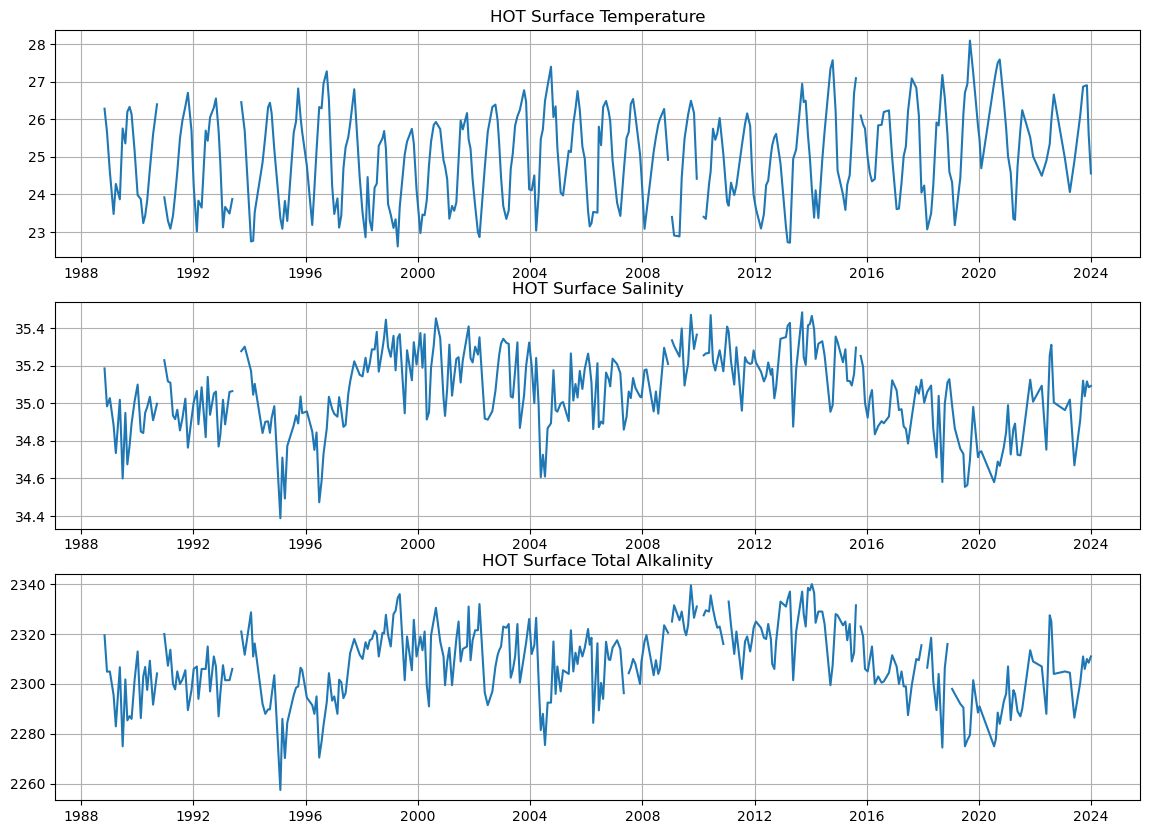

In [8]:
# Example 2 three panel plot
fig, ax = plt.subplots(figsize = (14,10), nrows = 3)

ax[0].plot(HOT_surface['date'],HOT_surface['temp'])
ax[0].set_title('HOT Surface Temperature')
ax[0].grid()

ax[1].plot(HOT_surface['date'],HOT_surface['sal'])
ax[1].set_title('HOT Surface Salinity')
ax[1].grid()

ax[2].plot(HOT_surface['date'],HOT_surface['TA'])
ax[2].set_title('HOT Surface Total Alkalinity')
ax[2].grid()

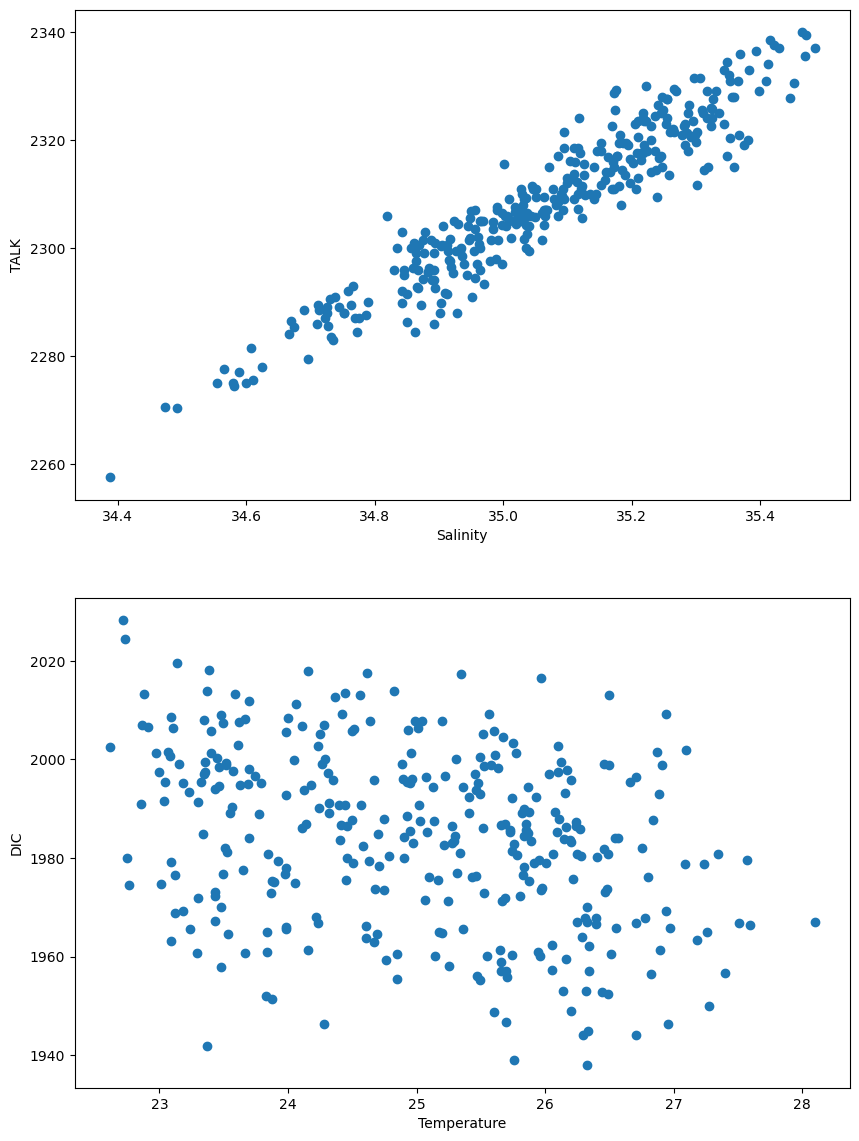

In [9]:
# Now we try repeat L et al 2001
fig, ax = plt.subplots( figsize = (10,14), nrows = 2 )
ax[0].scatter(HOT_surface['sal'],HOT_surface['TA'])
ax[0].set_xlabel('Salinity')
ax[0].set_ylabel('TALK')
ax[1].scatter(HOT_surface['temp'],HOT_surface['DIC'])
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('DIC');

### reproduce the HOT figure:

<img src='./images/hot.png'>

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_6795/944245614.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  CO2_data = pd.read_csv(URL,delim_whitespace=True,header=158,on_bad_lines='skip')


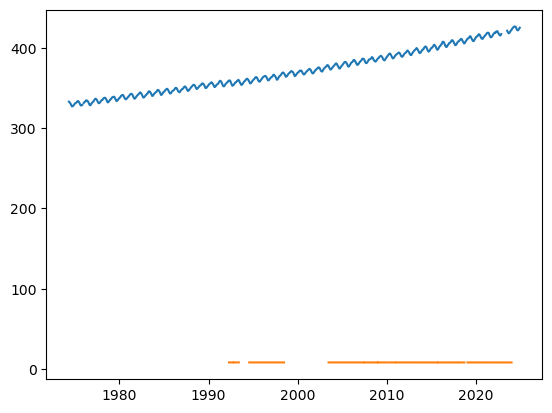

In [10]:
# Get the CO2 data from NOAA
URL = 'https://www.esrl.noaa.gov/gmd/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt'
CO2_data = pd.read_csv(URL,delim_whitespace=True,header=158,on_bad_lines='skip')
CO2_data.head()

# make datetime; note a little more tricky this time
year = (CO2_data['time_decimal'].astype(int))
doy = ( CO2_data['time_decimal'] - CO2_data['time_decimal'].astype(int) ) * 365.25
CO2_date = pd.to_datetime(year*1000+doy+1, format = '%Y%j')
CO2_data = CO2_data.replace(-999.99, np.nan)
CO2_data['date'] = CO2_date
plt.plot(CO2_data['date'],CO2_data['value'])
plt.plot(HOT_surface['date'],HOT_surface['pHmeas_insitu']);

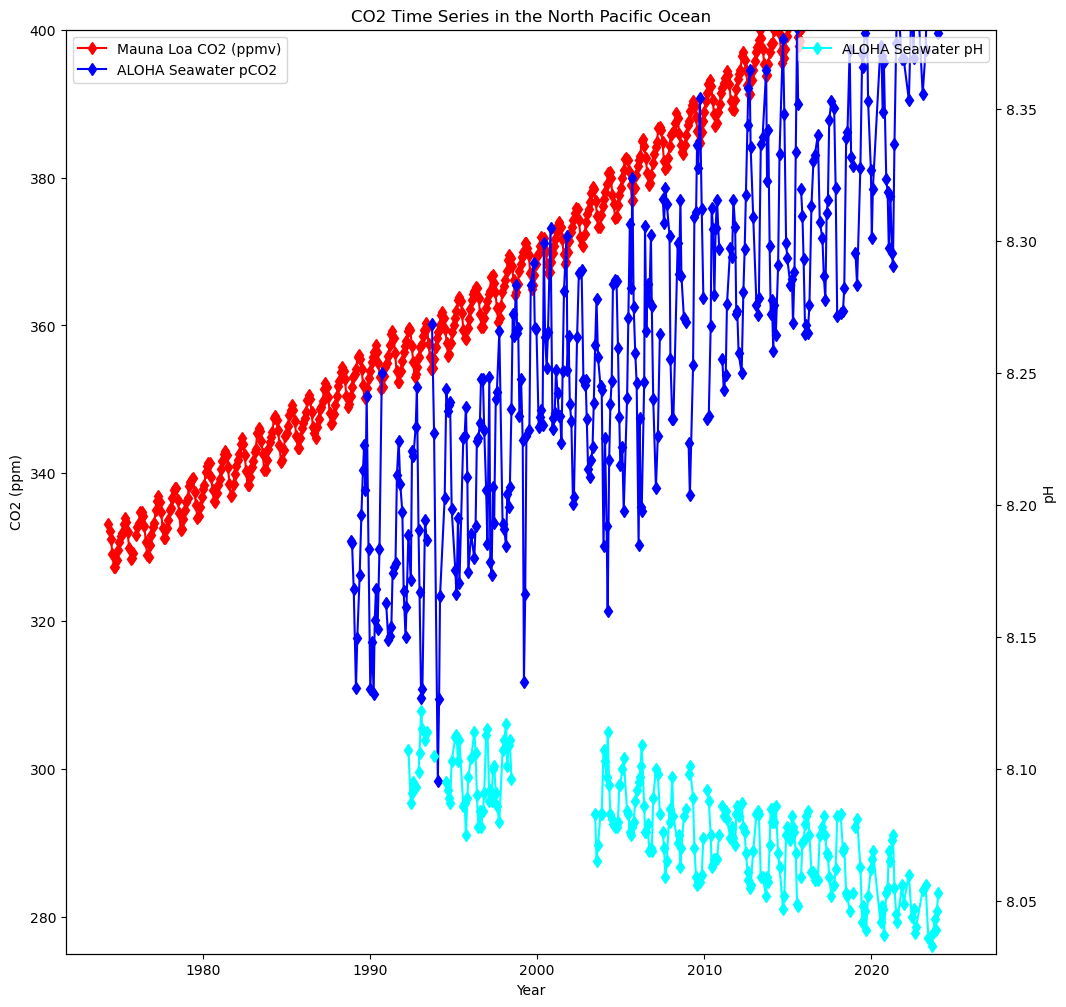

In [11]:
# We have a figure, but we have quite a few parameters to change:
# 1.  add titles and labels
# 2.  use same x-axis but different y-axis so we can see the variability
#     - we will define two axis objects, ax1 and ax2 and reference these
# 3.  add legend
#     - use plot object to get this

fig, ax1 = plt.subplots( figsize = (12,12) )
plt.title('CO2 Time Series in the North Pacific Ocean')

# 1. make first plot, CO2 (atm and ocean) as ax1
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppm)')
ax1.plot(CO2_data['date'], CO2_data['value'], marker = 'd', color='red',label='Mauna Loa CO2 (ppmv)')
#ax1.tick_params(axis='y', labelcolor='red')
ax1.plot(HOT_surface['date'], HOT_surface['pCO2calc_insitu'], marker = 'd', color='blue',label='ALOHA Seawater pCO2')
ax1.set_ylim(275,400)
ax1.legend()

# 2. instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('pH')
ax2.plot(HOT_surface['date'], HOT_surface['pHmeas_insitu'], marker = 'd', color='cyan',label='ALOHA Seawater pH')
#ax2.tick_params(axis='y', labelcolor='cyan')
ax2.set_ylim(8.03, 8.38)
ax2.legend();

In [12]:
# Now we need to fit some lines; to do this, we will use the scipy linear regression
# module
# define variables; note we only use rows where the variable is non a NAN
#x1 = np.array(CO2_data[CO2_data['value'].notna()]['date'].dropna(),dtype=float)
#y1 = np.array(CO2_data['value'].dropna()values,dtype=float)
x1 = np.array(CO2_data[CO2_data['value'].notna()]['date'],dtype=float)
y1 = np.array(CO2_data['value'].dropna(),dtype=float)
slope1, intercept1, r_value1, p_value1, std_err1 = sp.linregress(x1,y1)
xf = np.linspace(min(x1),max(x1),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf1 = (slope1*xf)+intercept1
print('r = ', r_value1, '\n', 'p = ', p_value1, '\n', 's = ', std_err1)

#x2 = np.array(HOT_surface[HOT_surface['pCO2calc_insitu'].notna()]['date'].dropna(), dtype=float)
#y2 = np.array(HOT_surface['pCO2calc_insitu'].dropna().values, dtype=float)
x2 = np.array(HOT_surface[HOT_surface['pCO2calc_insitu'].notna()]['date'], dtype=float)
y2 = np.array(HOT_surface['pCO2calc_insitu'].dropna(), dtype=float)
slope2, intercept2, r_value2, p_value2, std_err2 = sp.linregress(x2,y2)
xf = np.linspace(min(x2),max(x2),100)
xf2 = xf.copy()
xf2 = pd.to_datetime(xf2)
yf2 = (slope2*xf)+intercept2
print('r = ', r_value2, '\n', 'p = ', p_value2, '\n', 's = ', std_err2)

#x3 = np.array(HOT_surface[HOT_surface['pHmeas_insitu'].notna()]['date'].dropna(), dtype=float)
#y3 = np.array(HOT_surface['pHmeas_insitu'].dropna().values, dtype=float)
x3 = np.array(HOT_surface[HOT_surface['pHmeas_insitu'].notna()]['date'], dtype=float)
y3 = np.array(HOT_surface['pHmeas_insitu'].dropna(), dtype=float)
slope3, intercept3, r_value3, p_value3, std_err3 = sp.linregress(x3,y3)
xf = np.linspace(min(x3),max(x3),100)
xf3 = xf.copy()
xf3 = pd.to_datetime(xf3)
yf3 = (slope3*xf)+intercept3
print('r = ', r_value3, '\n', 'p = ', p_value3, '\n', 's = ', std_err3)

r =  0.9915321492398376 
 p =  0.0 
 s =  3.1289367545676224e-19
r =  0.8398006174143477 
 p =  2.0526612951048086e-91 
 s =  2.205603184886502e-18
r =  -0.7864467511123805 
 p =  1.492349727245959e-52 
 s =  2.7545074915322746e-21


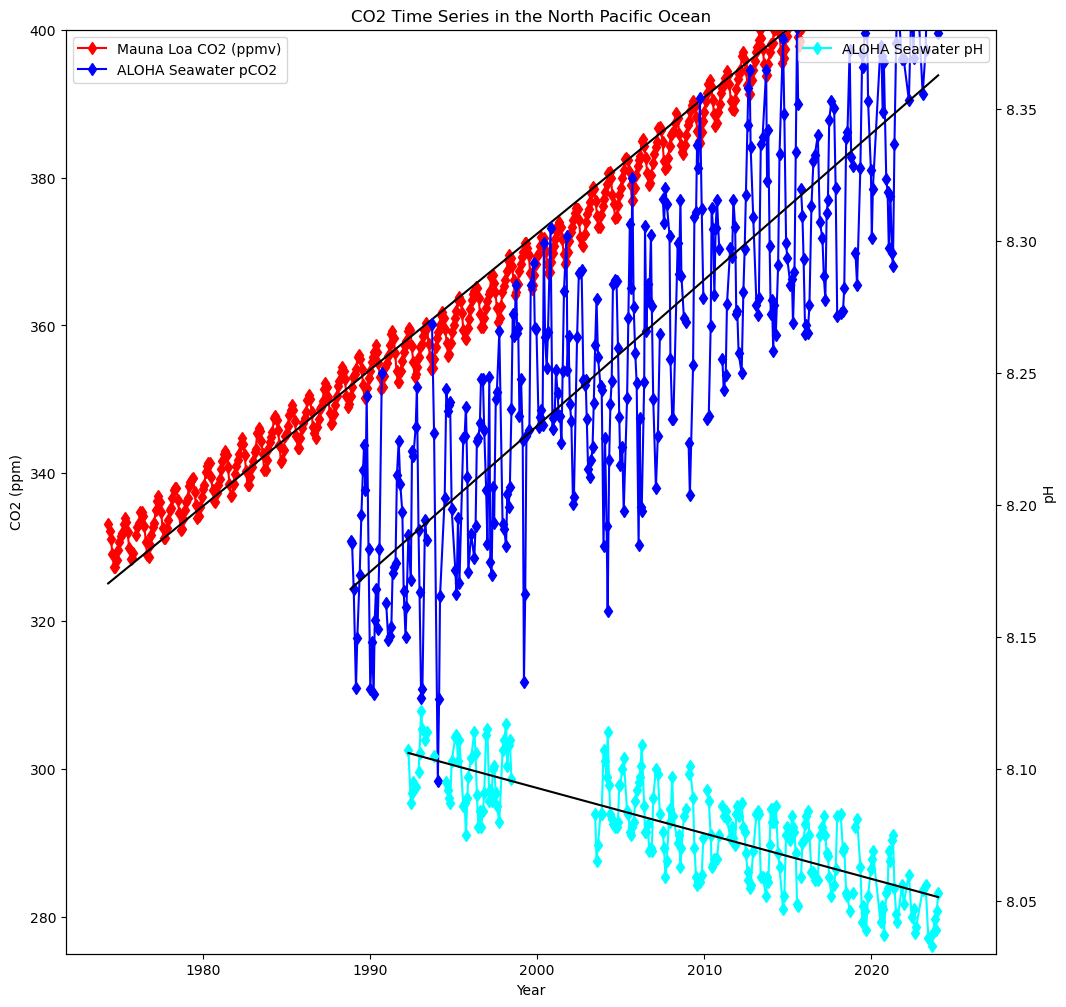

In [13]:
fig, ax1 = plt.subplots( figsize = (12,12) )
plt.title('CO2 Time Series in the North Pacific Ocean')

# 1. make first plot, CO2 (atm and ocean) as ax1
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppm)')
ax1.plot(CO2_data['date'], CO2_data['value'], marker = 'd', color='red',label='Mauna Loa CO2 (ppmv)')
ax1.plot(xf1, yf1,color='black')
#ax1.tick_params(axis='y', labelcolor='red')
ax1.plot(HOT_surface['date'], HOT_surface['pCO2calc_insitu'], marker = 'd', color='blue',label='ALOHA Seawater pCO2')
ax1.plot(xf2, yf2,color='black')
ax1.set_ylim(275,400)
ax1.legend()

# 2. instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('pH')
ax2.plot(HOT_surface['date'], HOT_surface['pHmeas_insitu'], marker = 'd', color='cyan',label='ALOHA Seawater pH')
ax2.plot(xf3, yf3, color='black')
#ax2.tick_params(axis='y', labelcolor='cyan')
ax2.set_ylim(8.03, 8.38)
ax2.legend();

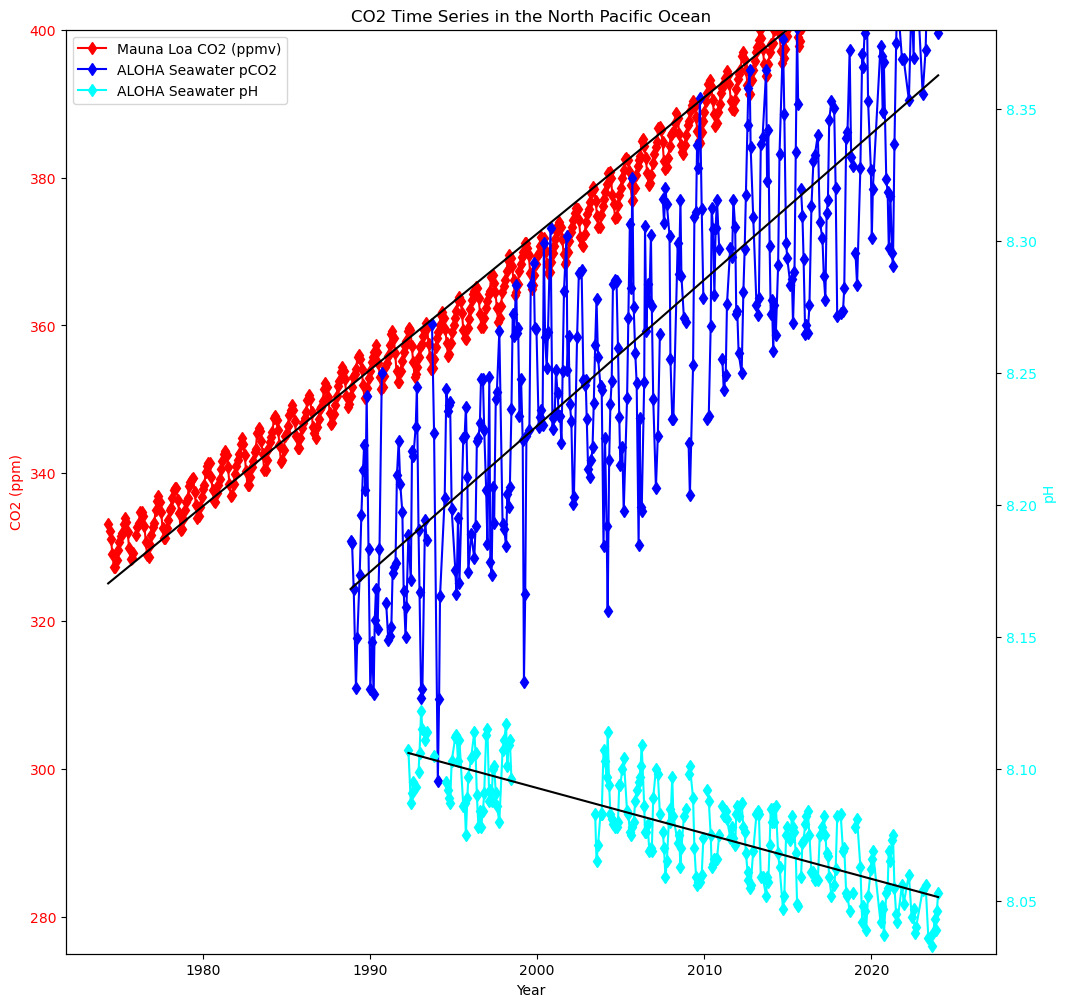

In [14]:
# All looks good except legend is broken in two parts

fig, ax1 = plt.subplots( figsize = (12,12) )
plt.title('CO2 Time Series in the North Pacific Ocean')

# 1. make first plot, CO2 (atm and ocean) as ax1
ax1.set_xlabel('Year')
# note here we can color the axis label the same as the line
ax1.set_ylabel('CO2 (ppm)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# save the plot object as lns1 and lns2
lns1 = ax1.plot(CO2_date, CO2_data['value'], marker = 'd', color='red',label='Mauna Loa CO2 (ppmv)')
lns2 = ax1.plot(HOT_surface['date'], HOT_surface['pCO2calc_insitu'],marker='d',color='blue',label='ALOHA Seawater pCO2')
ax1.plot(xf1, yf1,color='black')
ax1.plot(xf2, yf2,color='black')
ax1.set_ylim(275,400)

# 2. instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('pH', color='cyan')
ax2.tick_params(axis='y', labelcolor='cyan')

# save the third plot object as lns3
lns3 = ax2.plot(HOT_surface['date'], HOT_surface['pHmeas_insitu'], marker='d',color='cyan',label='ALOHA Seawater pH')
ax2.plot(xf3, yf3,color='black')
ax2.set_ylim(8.03, 8.38)

# finally, show the legend based on lns1, lns2 and lns3
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0);

## 2. Data with two dimensions (depth and time)

Next, we will look at how to visualize data with an added dimension, depth in this case.  We will use contour/color shaded plots.  These are a common way to visualize two-dimensional data.  You could have, for example, a map of temperature so the x-axis is longitude, the y-axis is latitude, and then the temperature is color-shaded.

There are a few different ways to make such plots in Python, including "contour", "contourf", "pcolor" and "imshow". You can find the difference from the Python Matplotlib help pages on the web.  First we will go through some generic examples, then try make one from actual HOT data.


### 2a. Synthetic data
Let's start with a simple example. We define a variable, A, that is a function of y and z defined as follows:

y = sin(x)

z = cos(x) 

In [15]:
# Recall how we can create a sine/cosine 0 to 2 pi:
x = np.arange(0, 2*np.pi+0.01, 0.01)
y = np.sin(x)
z = np.cos(x)

# We now make a two dimensional (axis), array
A = y[:,np.newaxis] * z

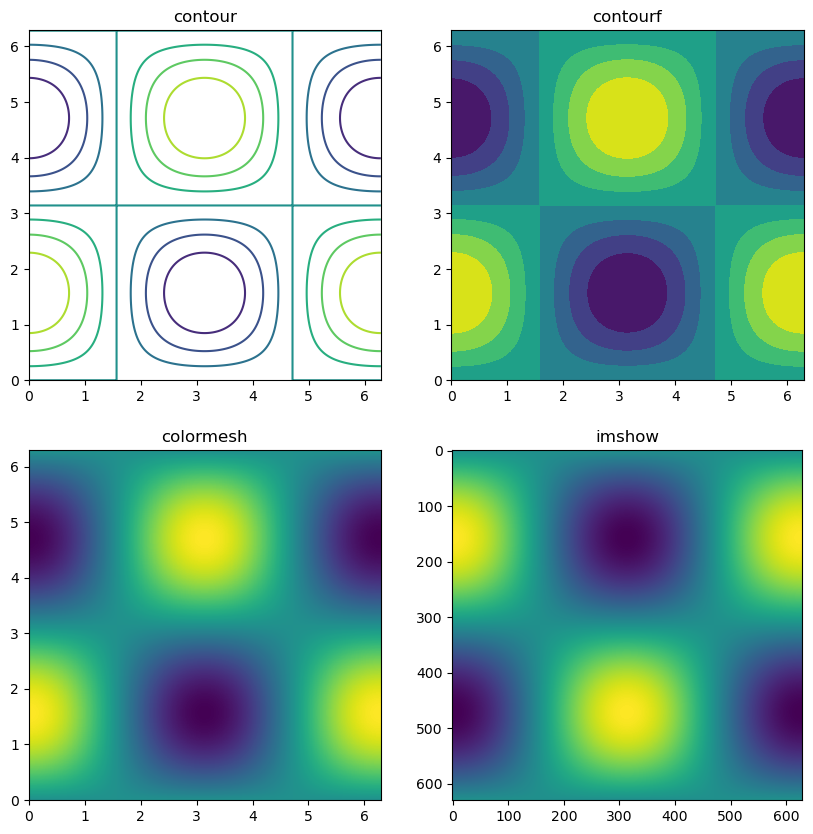

In [16]:
# Now we make a four panel plot, 2 rows and 2 columns showing different methods
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].contour(x, x, A)
ax[0,0].set_title('contour')
ax[0,1].contourf(x, x, A)
ax[0,1].set_title('contourf')
ax[1,0].pcolormesh(x, x, A, shading='auto')
ax[1,0].set_title('colormesh')
ax[1,1].imshow(A)
ax[1,1].set_title('imshow');

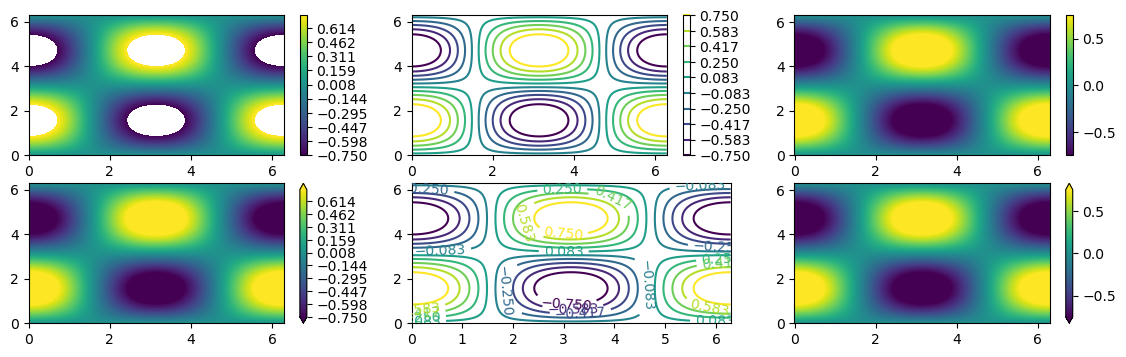

In [17]:
# color levels in plot
clevs = np.linspace(-0.75, 0.75, 100)
clevs1 = np.linspace(-0.75, 0.75, 10)

fig, ax = plt.subplots(2,3, figsize = (14,4))

# contourf cuts out data beyond limits normally
cs0 = ax[0,0].contourf(x, x, A, levels=clevs)
plt.colorbar(cs0, ax=ax[0,0])

# this can be fixed by extending the color range, 
# which automatically extends the color bar as well when 
# it is called
cs1 = ax[1,0].contourf(x, x, A, levels=clevs, extend='both')
plt.colorbar(cs1, ax=ax[1,0])

# contour behaves as contourf does
cs2 = ax[0,1].contour(x, x, A, levels=clevs1)
plt.colorbar(cs2, ax=ax[0,1])

# in some cases, it makes more sense to add labels directly
# to contours instead of a colorbar
cs3 = ax[1,1].contour(x, x, A, levels=clevs1)
ax[1,1].clabel(cs3, cs3.levels, inline=True)

# pcolormesh takes limits only, not color levels;
# it does not cut off data beyond the given limits,
# but it does not automatically extend the colorbar
cs4 = ax[0,2].pcolormesh(x, x, A, vmin=-0.75, vmax=0.75, shading='auto')
plt.colorbar(cs4, ax=ax[0,2])

# that must be done manually
cs5 = ax[1,2].pcolormesh(x, x, A, vmin=-0.75, vmax=0.75, shading='auto')
plt.colorbar(cs5, ax=ax[1,2], extend = 'both')

### 2b. HOT data

The second data set we will use is somewhat similar to HOT_surface_CO2: it is an ASCII table with columns separated by white spaces.  However, in this case there are no column names, so we will have to add those.  The data are available from the anonymous ftp server in SOEST, but the file is updated every year, and some times the name format changes (_e.g._, years, year, year01, year1, _.etc._).  The most recent one is year1_35.ctd.data found at ftp://ftp.soest.hawaii.edu/hot/ctd/year1_35ctd.dat.

Note the data are aligned in an ASCII table, so we can use Pandas read_csv.  The columns are day since Jan 1, 1988; depth (m); density; temperature (C); salinity; oxygen.  There is a space between the columns, so we will need to specify that as the delimiter.

In [18]:
# Download the data from the web site, and read it in.  Note we need to
# specify that the column separater is white space (not commas)
# Like last time, we can specify the column titles since there are none
# in the file itself
column_names = ['day','depth','density','temperature','salinity','oxygen']
hot_ctd = pd.read_csv('data/year1_35ctd.dat', header=None, delim_whitespace=True, names=column_names)

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_6795/1088934825.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hot_ctd = pd.read_csv('data/year1_35ctd.dat', header=None, delim_whitespace=True, names=column_names)


In [19]:
# The time is given as "days since January 1, 1988", but we can easily
# change this to a more proper date with datatime
date = pd.to_datetime(hot_ctd['day'], origin = '01-01-1988', unit='D')

In [20]:
# Let's now add this variable to the dataframe, and make it the index
hot_ctd['date']=date
hot_ctd = hot_ctd.set_index('date')

In [21]:
# Okay, what do we have
hot_ctd.head()

,day,depth,density,temperature,salinity,oxygen
date,,,,,,
1988-11-01,305,0,-23.1225,26.2843,35.2335,224.00
1988-11-01,305,-2,-23.1192,26.2737,35.2247,226.20
1988-11-01,305,-4,-23.1025,26.2864,35.2079,224.75
1988-11-01,305,-6,-23.1076,26.2687,35.2073,215.70
1988-11-01,305,-8,-23.1102,26.2652,35.2093,218.00


In [25]:
#Z = hot_ctd.pivot_table(index='date', columns='depth', values='temperature').T.values
Z = hot_ctd.pivot_table(index='date', columns='depth', values='temperature').values
X_unique = np.sort(hot_ctd.depth.unique())
Y_unique = np.sort(hot_ctd.index.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
print(X.shape,Y.shape,Z.shape)

(341, 721) (341, 721) (341, 721)


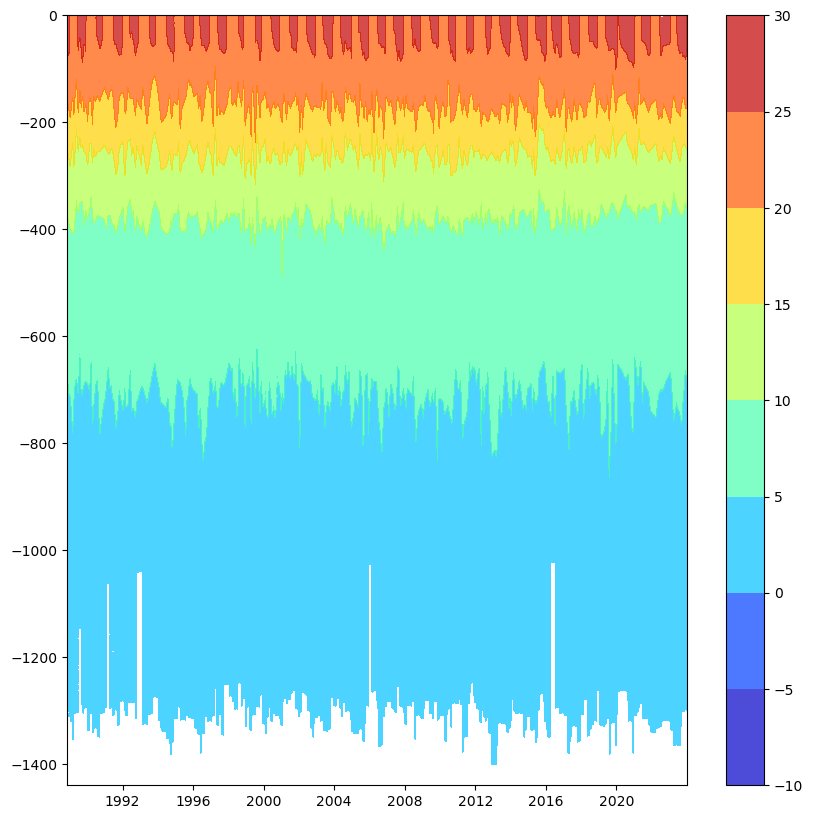

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet);
plt.colorbar()

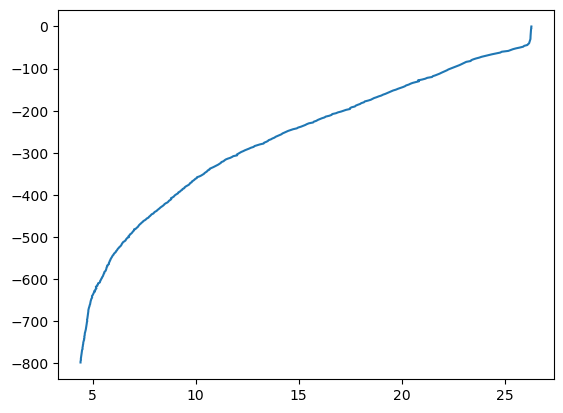

In [24]:
x = hot_ctd['temperature'][0:400]
y = hot_ctd['depth'][0:400]
plt.plot(x,y)